## Boston Housing Price Models- Discussed in Chollet section 3.6 page 85

Building a regression model in Tensorflow

This data set is now generally recognized as being problematic
There is an unpleasant racial bias embedded in one variable, and the complete data behind this variable cannot be seen.  Those are problems.



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets) =boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_data[1:5,1:13]

array([[8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01, 7.6100e+00,
        1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02, 1.4700e+01,
        3.9538e+02, 3.1100e+00],
       [0.0000e+00, 1.8100e+01, 0.0000e+00, 6.3100e-01, 4.9700e+00,
        1.0000e+02, 1.3325e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01,
        3.7552e+02, 3.2600e+00],
       [0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01, 6.0370e+00,
        3.4500e+01, 5.9853e+00, 5.0000e+00, 2.2400e+02, 2.0200e+01,
        3.9690e+02, 8.0100e+00],
       [0.0000e+00, 1.8100e+01, 0.0000e+00, 7.1300e-01, 6.3760e+00,
        8.8400e+01, 2.5671e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01,
        3.9143e+02, 1.4650e+01]])

In [7]:
type(train_data)

numpy.ndarray

http://lib.stat.cmu.edu/datasets/boston


The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town

 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS    proportion of non-retail business acres per town

 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX      nitric oxides concentration (parts per 10 million)

 RM       average number of rooms per dwelling

 AGE      proportion of owner-occupied units built prior to 1940

 DIS      weighted distances to five Boston employment centres

 RAD      index of accessibility to radial highways

 TAX      full-value property-tax rate per $10,000

 PTRATIO  pupil-teacher ratio by town

 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT    % lower status of the population

 MEDV     Median value of owner-occupied homes in $1000's

the targets are the house price sin thousands of dollars

# **Question/Task**

Remove the variable B from the data set at this point, before the test-train split

Create yourself a list of the variable names as well

In [24]:
# Task

Standardize the data, subtracting the mean and dividing by the standard deviation,  this is a "Z standardization", and could be done with scikit learn functions, there may be built-in functions in tensorflow as well

Note use of the mean and std of the train data to standardardize the test data, the same standardization is used

In [8]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data=train_data/std

test_data -= mean
test_data /= std

Create a validation set from the training data

In [9]:
# split off a validation set from the training data
from sklearn.model_selection import train_test_split

X_train2, X_valid, y_train2, y_valid = train_test_split(train_data, train_targets, test_size=0.2, random_state=42)

Build a function to create models

# ***Questions:***

What is the structure of this model?
    
How many layers?    

Why no activation on the output layer?

Notice that build_model is a function to create copies of this particular model,  used in the K-fold cross validation used later

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation="relu",input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation="relu"))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',loss='mse',metrics=['mse','mae'])
    return(model)

In [11]:
from tensorflow.keras.callbacks import History
history = History()

In [12]:
model = build_model()
# Train the model (in silent mode, verbose=0)
num_epochs=60

history= model.fit(X_train2, y_train2,epochs=num_epochs, batch_size=64, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/60
6/6 [==============================] - 2s 100ms/step - loss: 613.4221 - mse: 613.4221 - mae: 22.8007 - val_loss: 441.9888 - val_mse: 441.9888 - val_mae: 19.7518
Epoch 2/60
6/6 [==============================] - 0s 38ms/step - loss: 562.2900 - mse: 562.2900 - mae: 21.7008 - val_loss: 404.8550 - val_mse: 404.8550 - val_mae: 18.8053
Epoch 3/60
6/6 [==============================] - 0s 34ms/step - loss: 517.2238 - mse: 517.2238 - mae: 20.6826 - val_loss: 371.3527 - val_mse: 371.3527 - val_mae: 17.8993
Epoch 4/60
6/6 [==============================] - 0s 25ms/step - loss: 474.1097 - mse: 474.1097 - mae: 19.6328 - val_loss: 335.5793 - val_mse: 335.5793 - val_mae: 16.8664
Epoch 5/60
6/6 [==============================] - 0s 38ms/step - loss: 427.5535 - mse: 427.5535 - mae: 18.4656 - val_loss: 297.9335 - val_mse: 297.9335 - val_mae: 15.7205
Epoch 6/60
6/6 [==============================] - 0s 49ms/step - loss: 378.9018 - mse: 378.9018 - mae: 17.1732 - val_loss: 258.4138 - val_mse: 2

In [13]:
history_dict=history.history

In [14]:
history_dict.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

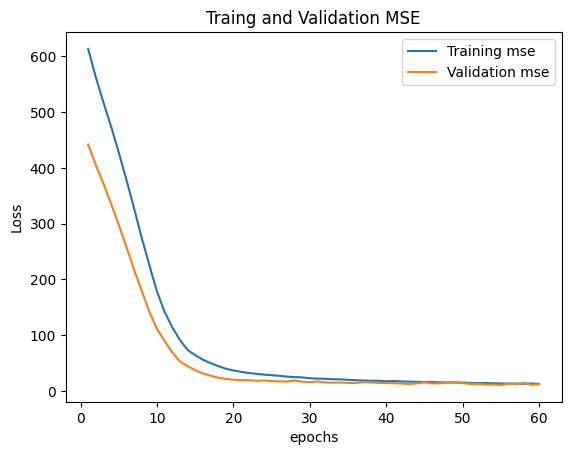

In [15]:
import matplotlib.pyplot as plt

mse_values=history_dict['mse']
val_mse_values=history_dict['val_mse']
epoch=range(1,len(mse_values)+1)

plt.plot(epoch,mse_values,label='Training mse')
plt.plot(epoch,val_mse_values,label="Validation mse")
plt.title("Traing and Validation MSE")
plt.xlabel("epochs")
plt.ylabel("Loss")
#plt.ylim(0,100)
plt.legend()
plt.show()

# ***Question/Test***

is there any indication of overfitting here?

What does that indicate about model complexity?

Create a more complex model (another layer maybe???) and check on it's performance and evidence of overfitting

# ***Questions/Operation***,  

** Run Eli5 and Shap on this model to identify the important variables**


**Question**

What is the F value for this model?

What is the R^2 or the adjusted R^2 for the model?

# K-fold validation

Omit 1/k of the data at a time, build and train the model, then evaluate the performance on the omitted portion

This is from an older k-fold validation model,  there are some easier ways to do this

In [16]:
import numpy as np

k=4
num_val_samples=len(train_data)//k
num_epochs=10
all_scores=[]

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=1)          # alter the batch size to change speed here
    # Evaluate the model on the validation data
    val_mse, val_mae, val_loss = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/10
303/303 [==============================] - 3s 6ms/step - loss: 201.1525 - mse: 201.1525 - mae: 10.5739
Epoch 2/10
303/303 [==============================] - 1s 2ms/step - loss: 27.6455 - mse: 27.6455 - mae: 3.6110
Epoch 3/10
303/303 [==============================] - 0s 2ms/step - loss: 19.7471 - mse: 19.7471 - mae: 3.0214
Epoch 4/10
303/303 [==============================] - 0s 2ms/step - loss: 16.7697 - mse: 16.7697 - mae: 2.8332
Epoch 5/10
303/303 [==============================] - 1s 2ms/step - loss: 14.9902 - mse: 14.9902 - mae: 2.6138
Epoch 6/10
303/303 [==============================] - 1s 2ms/step - loss: 14.1846 - mse: 14.1846 - mae: 2.4799
Epoch 7/10
303/303 [==============================] - 1s 2ms/step - loss: 12.9114 - mse: 12.9114 - mae: 2.4428
Epoch 8/10
303/303 [==============================] - 1s 3ms/step - loss: 12.3278 - mse: 12.3278 - mae: 2.4138
Epoch 9/10
303/303 [==============================] - 1s 3ms/step - loss: 11.9320 - mse: 

In [17]:
all_scores

[8.704679489135742, 13.195023536682129, 18.091590881347656, 18.77276039123535]

In [18]:
np.mean(all_scores)

14.69101357460022

In [19]:
np.std(all_scores)

4.071202680738846

Tracking training performance over the k-folds- in other words, the average training curve over the folds- this is going to take a while

setting verbose=1 turns off the training feedback

In [20]:
num_epochs = 10   # book uses 500 here-see how much run time you can tolerate, also change the batch size
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)     #note I changed batch size from 1 to 16 here
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [21]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [22]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

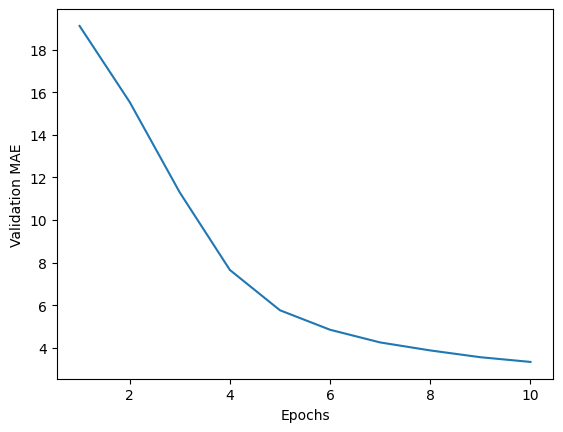

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Replot, but remove the first 10 points, and then smooth the data